### Australian Weather Insights Tracker

##### About Data

This dataset contains weather information from many of the weather stations around Australia. For most weather stations,there are about 365 observations for the years 2007 to 2017.The .csv file used for this analysis is downloaded from [kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv) website.

The data contains over 142k rows and 24 columns.The variable RainTomorrow means -did it rain the next day?.More detailed information of dataset can be found in the Australian Bureau of Meterology website.


##### Table of contents
1. Load Data
2. Inspect Data
3. Clean & Prepare Data
4. Exploratory Data Analysis
5. Summary
6. Future Work

##### 1. Load Data

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
df = pd.read_csv("weatherAUS.csv", parse_dates=['Date'])
df.head()

##### 2. Inpect Data

In [ ]:
df.shape

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [40]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-n

In [41]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [42]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Let's double check the years we have data for, and how many values do we have per year

In [43]:
df['Date'].dt.year.value_counts()

2016    17508
2014    17400
2015    17231
2009    16595
2010    16419
2013    16097
2011    15126
2012    15044
2017     8466
2008     2246
2007       61
Name: Date, dtype: int64

Looks like not much data recorded for year 2007 .Let's check for which all stations it is recorded.

In [44]:
df[df['Date'].dt.year==2007]['Location'].unique()

array(['Canberra'], dtype=object)

Let's check data for Perth per year

In [45]:
df.loc[df['Location'] == 'Perth', 'Date'].dt.year.value_counts()

2016    366
2015    365
2009    365
2014    365
2010    365
2013    337
2011    335
2012    335
2008    184
2017    176
Name: Date, dtype: int64

##### 2.1. Findings, Inconsistencies or Issues

1. There are lot of missing values.
2. For year 2007 data only recorded for Canberrra whether station.

##### 3. Clean & Prepare Data

In [ ]:
# Let's normalise the columns
df.columns = [col.lower() for col in df.columns]
df.columns

##### 3.1 Dealing with Missing Values

Get rid of rows with too many missing values for each column.What we will do first by selecting to keep rows with at least 80% of the data in them. 

In [47]:
dfmiss = df.dropna(thresh=18).copy()

In [48]:
# check if there was a significant change
(dfmiss.isna().sum() / dfmiss.shape[0]) * 100

date              0.000000
location          0.000000
mintemp           0.082512
maxtemp           0.046003
rainfall          0.681276
evaporation      41.154736
sunshine         45.911982
windgustdir       4.102257
windgustspeed     4.081811
winddir9am        5.026689
winddir3pm        0.579778
windspeed9am      0.116832
windspeed3pm      0.100767
humidity9am       0.608256
humidity3pm       1.081424
pressure9am       7.302719
pressure3pm       7.266939
cloud9am         37.232839
cloud3pm         38.763335
temp9am           0.088354
temp3pm           0.536696
raintoday         0.681276
risk_mm           0.000000
raintomorrow      0.000000
dtype: float64

In [49]:
df.shape[0] - dfmiss.shape[0]
dfmiss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136949 entries, 0 to 142192
Data columns (total 24 columns):
date             136949 non-null datetime64[ns]
location         136949 non-null object
mintemp          136836 non-null float64
maxtemp          136886 non-null float64
rainfall         136016 non-null float64
evaporation      80588 non-null float64
sunshine         74073 non-null float64
windgustdir      131331 non-null object
windgustspeed    131359 non-null float64
winddir9am       130065 non-null object
winddir3pm       136155 non-null object
windspeed9am     136789 non-null float64
windspeed3pm     136811 non-null float64
humidity9am      136116 non-null float64
humidity3pm      135468 non-null float64
pressure9am      126948 non-null float64
pressure3pm      126997 non-null float64
cloud9am         85959 non-null float64
cloud3pm         83863 non-null float64
temp9am          136828 non-null float64
temp3pm          136214 non-null float64
raintoday        136016 non-n

We will iterate over the columns.If it is a float,fill in missing values with the median of that column
else
if the column contains data of type object and it has any missing values
,convert the column to a category type
and forward fill the missing values.

In [50]:
for col in dfmiss.columns:
    if (dfmiss[col].dtype == 'float64') & (dfmiss[col].isna().any()):
        dfmiss[col].fillna(value=dfmiss[col].median(), axis=0, inplace=True)
    elif (dfmiss[col].dtype == 'object') & (dfmiss[col].isna().any()):
        dfmiss[col].astype('category', copy=True)
        dfmiss[col].fillna(method='ffill', axis=0, inplace=True)

Now all the missing values are replaced.

In [51]:
dfmiss.isna().sum()

date             0
location         0
mintemp          0
maxtemp          0
rainfall         0
evaporation      0
sunshine         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
raintoday        0
risk_mm          0
raintomorrow     0
dtype: int64

Since weather is time series data,create additional date variables for visualisation.

In [52]:
dfmiss['month'] = dfmiss['date'].dt.month
dfmiss['year'] = dfmiss['date'].dt.year
dfmiss['week'] = dfmiss['date'].dt.week
dfmiss['weekday'] = dfmiss['date'].dt.weekday
dfmiss['quarter'] = dfmiss['date'].dt.quarter
dfmiss['day_of_week'] = dfmiss['date'].dt.day_name()
dfmiss['week_or_end'] = dfmiss['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'week_day')
dfmiss.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0.0,No,12,2008,49,0,4,Monday,week_day
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0.0,No,12,2008,49,1,4,Tuesday,week_day
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0.0,No,12,2008,49,2,4,Wednesday,week_day
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,1.0,No,12,2008,49,3,4,Thursday,week_day
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,2008,49,4,4,Friday,week_day


We might want to represent the quarter variable as an object later on,so create a dictionary with the values, and pass it to our Python's .map() method. 

In [59]:
mapping = {1:'first_Q',
           2:'second_Q',
           3:'third_Q',
           4:'fourth_Q'}

dfmiss['qtr_cate'] = dfmiss['quarter'].map(mapping)

Drop unwanted columns and save the dataset for later use.

In [60]:
df.drop(columns=['risk_mm'],axis=1,inplace=True)

In [61]:
df_ready = dfmiss.reset_index(drop=True).copy()
df_ready.to_csv('weather_ready.csv', index=False)

##### 4. Exploratorary Data Analysis

In [70]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [65]:
df = pd.read_csv('weather_ready.csv', parse_dates=['date'])
df.head(3)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,risk_mm,raintomorrow,month,year,week,weekday,quarter,day_of_week,week_or_end,qtr_cate
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,0.0,No,12,2008,49,0,4,Monday,week_day,fourth_Q
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,0.0,No,12,2008,49,1,4,Tuesday,week_day,fourth_Q
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,0.0,No,12,2008,49,2,4,Wednesday,week_day,fourth_Q


Fig 1: Let's examine maximum temperature distribution.The plot tells upon first inspection that our data is normally distributed.

In [ ]:
plt.hist(x=df['maxtemp'], color='green', bins=40, edgecolor='white')
plt.title('Maximum Temperature - 2007-2017')
plt.show()

Fig 2: Let's plot maximum and minimum temperature together and see the distribution.

In [ ]:
plt.hist(x=df['maxtemp'], color='red', bins=50, histtype='stepfilled', alpha=0.4)
plt.hist(x=df['mintemp'], color='cyan', bins=50, histtype='stepfilled', alpha=0.5)
plt.title('Maximum & Minimum Temperature - 2007-2017', fontdict={'fontsize': 15})
plt.xlabel('Temperature Distribution in Celcius')
plt.ylabel('Temperature Frequency in 10 Years')
plt.show()

Fig 3: Are there any relationship between rain and temperature at 3pm?

In [ ]:
plt.scatter(x=df['rainfall'], y=df['temp3pm'], marker='.', color='red', alpha=0.7, s=1.5)
plt.xlim(0, 250)
plt.title('Relationship Between Rain and Temperature at 3 pm from 2007-2017', fontdict={'fontsize': 10})
plt.xlabel('Rainfall')
plt.ylabel('Temperature Frequency at 3 pm')
plt.show()


Find average humidity by year

In [ ]:
hum_by_year = df.pivot_table(
    index='year',
    values=['humidity9am', 'humidity3pm'],
    aggfunc='mean'
)
hum_by_year

Fig 4: Plot Average humidity at 9m and 3pm by year.

In [ ]:
# Create the fig and ax objects
fig, ax = plt.subplots()

# add the 9am data and label to the ax object
ax.plot(hum_by_year.index, hum_by_year['humidity9am'], label='Humidity 9am', marker='o')
# add the 3pm data and label to the ax object
ax.plot(hum_by_year.index, hum_by_year['humidity3pm'], label='Humidity 3pm', marker='v')
ax.set_xlabel("Years")
ax.set_ylabel("Average Humidity")
# show the legend with labels
plt.legend()
plt.show()

Fig 5: Show the distributions of our 4 temperature variables

In [ ]:
# Create the fig and ax objects
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(10, 8))

# add the 9am data and label to the ax object
ax[0, 0].hist(df['mintemp'], bins=55, color='blue', alpha=0.5)
ax[0, 1].hist(df['maxtemp'], bins=55, color='red', alpha=0.5)
ax[1, 0].hist(df['temp9am'], bins=55, color='cyan', alpha=0.5)
ax[1, 1].hist(df['temp3pm'], bins=55, color='green', alpha=0.5)

# ax.set(title="Distributions of Temperatures between 2007-2017")
ax[0, 0].set_xlabel("Min Temperature")
ax[0, 1].set_xlabel("Max Temperature")
ax[1, 0].set_xlabel("Temp at 9am")
ax[1, 1].set_xlabel("Temp at 3pm")
ax[0, 0].set_ylabel("Frequency")
ax[1, 0].set_ylabel("Frequency")

fig.savefig('temp_plots.png')


Fig 6: Where does wind come from most of the time?

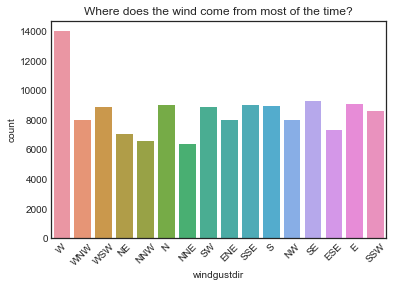

In [79]:
sns.countplot(x='windgustdir', data=df)
plt.xticks(rotation=45)
plt.title("Where does the wind come from most of the time?")
plt.show()

Fig 7: Did it rain a lot in Perth in 2014?

In [ ]:
sns.countplot(x='raintoday', data=df[(df['location'] == 'Perth') & (df['year'] == 2014)])
plt.xlabel("Did it Rain Today?")
plt.title("Did it rain a lot in Perth in 2014?")
plt.show()

Fig 8: Did it rain a lot in 2014?

In [ ]:
df_2014 = df[df['year'] == 2014].copy()
df_2014.shape
sns.catplot(x='raintomorrow', data=df_2014, kind='count')
plt.xlabel("Did it Rain Tomorrow?")
plt.title("Did it rain a lot in 2014?")
plt.show()

Fig 9: Let's check amount of rain in inches and per day in 2014

In [ ]:
sns.catplot(x='day_of_week', y='rainfall', data=df_2014, kind='bar')
plt.xlabel("Day of the Week")
plt.ylabel("Rain Fall (inches)")
plt.title("Amount of rain in inches and per day in 2014")
plt.show()

Fig 10: Distribution of maximum temperature in weekdays of 2014

In [ ]:
sns.catplot(x='day_of_week', y='maxtemp', data=df_2014, kind='box')
plt.xlabel("Day of the Week")
plt.ylabel("Max Temp")
plt.title("Distribution of the Max Temp in the weekdays of 2014")
plt.show()

Fig 11: Did it rail a lot in Perth in 2014?

In [ ]:
palette_colors = {'weekend': "green", 'week_day': "blue"}

sns.countplot(x='raintoday', data=df[(df['location'] == 'Perth') & (df['year'] == 2014)],
              hue='week_or_end', palette=palette_colors)

plt.title("Did it rain a lot in Perth in 2014?")

plt.show()

Fig 12: Are rainy days correlated with high temperatures?

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x='maxtemp', y='rainfall', data=df)
plt.title("Are rainy days correlated with high temperatures?")
plt.show()

Fig 13: If it is humid in the morning will it be humid in the afternoon?

In [ ]:
sns.scatterplot(x='humidity9am', y='temp3pm', data=df.sample(frac=.05), hue='raintomorrow')
plt.xlabel("Humidity at 9am")
plt.ylabel("Humidity at 3pm")
plt.title("If it is humid in the mornig will it be humid in the afternoon?")
plt.show()

Fig 14: Is there any relationship between rainfall and windspeed at 9am?

In [ ]:
sns.relplot(x='rainfall', 
            y='windspeed9am', 
            data=df_2014, 
            kind='scatter',
            col='week_or_end')
plt.show()

Fig 15: Is there any relationship between rainfall and windspeed at 9am?

In [ ]:
sns.relplot(x='rainfall', 
            y='windspeed9am', 
            data=df_2014, 
            kind='scatter',
            col='week_or_end',
            row='raintomorrow')
plt.show()

Fig 16: Is there any relationship between rainfall and windspeed at 9am

In [ ]:
df_2014_no_outliers = df_2014[df_2014['rainfall'] < 60]
sns.relplot(x='rainfall', 
            y='maxtemp', 
            data=df_2014_no_outliers.sample(frac=0.2), 
            kind='scatter',
            hue='weekday',
            size='weekday')
plt.show()

Fig 17: Precipitation Monthly Trend in 2014

In [ ]:
sns.relplot(x='month', y='rainfall', data=df_2014, kind='line')
plt.xlabel('Months of 2014')
plt.ylabel('Rain in inches')
plt.title("Precipitation Monthly Trend in 2014")
plt.show()

Fig 18: Precipitation Monthly Trend by Week or W-End in 2014

In [ ]:
sns.relplot(x='month', y='rainfall', data=df_2014, kind='line', style='week_or_end', hue='week_or_end', markers=True, ci=False)
plt.xlabel('Months of 2014')
plt.ylabel('Rain in inches')
plt.title("Precipitation Monthly Trend by Week or W-End in 2014")
plt.savefig("more_trends", dpi=350)
plt.show()

Fig 19: Interactive graph using bokeh

In [ ]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
output_notebook()

%matplotlib inline
plot.circle(df['rainfall'], df['mintemp'])
output_file('circle.html')

In [ ]:
p.circle(x=df['rainfall'], y=df['humidity9am'], size=4)
show(p)

In [ ]:
Color mapping
from bokeh.models import CategoricalColorMapper
# this tool allows us to map specific colors to specific categories within a variable
mapper = CategoricalColorMapper(
    factors=['first_Q', 'second_Q', 'third_Q', 'fourth_Q'],
    palette=['bisque', 'rosybrown', 'chocolate', 'maroon']
)

# labels can be added within the figure parameter
plot5 = figure(x_axis_label='rainfall',
              y_axis_label='mintemp'
              )

plot5.circle('rainfall', 'mintemp',
            size=7, source=df,
            color={'field':'qtr_cate', # pass in the color as a dictionary and specify the field first, e.g. our qrt_cate variable
                  'transform': mapper}, # assign the colors with transform param
            legend='qtr_cate' # add your legend for the categories
           )

# move the legend to a convenient spot
plot5.legend.location = 'top_right'


##### 5. Summary